In [59]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib
import tensorflow as tf
import seaborn as sns
sns.set()
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA as sk_pca
from mpl_toolkits.mplot3d import Axes3D
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from IPython.display import clear_output

In [60]:
#Read all the Curucumin values into different tables
sheets_dict = pd.read_excel(r'C:\Users\Utsav Dutta\Desktop\ITC\Merged ITC Results.xlsx', sheetname=None)

a={}
for x in sheets_dict.keys():
    a[sheets_dict[x]['Curucumin'][0]]=sheets_dict[x]

l=list(a.keys())
l.sort()

#Create dataframes with index in ascending order of Curucumin values
df={}
for x in range(0,len(l)):
    df[x]=a[l[x]]
    df[x]=df[x].drop(['Reference\\','Commodity\\','isPowder\\','Scans\\','Moisture\\','Protein\\','Oil\\','Beta\\','Scale\\'],axis=1)
    df[x]['Device\\']=df[x]['Device\\'][0]
    df[x]['Curucumin']=df[x]['Curucumin'][0]
    df[x]=df[x].rename(columns = lambda x : str(x)[:-1])
    df[x]=df[x].rename(columns = {'Curucumi':'Curucumin'})

#Split into 3 dataframes for each device
df_1={}
df_2={}
df_3={}

#Reorder keys of dataframe in ascending order of Curucumin values
Df_1={}
Df_2={}
Df_3={}

for x in df.keys():
    if df[x]['Device'][0]=='809R011':
        df_1[x]=df[x]
    if df[x]['Device'][0]=='809R004':
        df_2[x]=df[x]
    if df[x]['Device'][0]=='809R001':
        df_3[x]=df[x]

for x in range(0,len(df_1.keys())):
    Df_1[x]=df_1[list(df_1.keys())[x]]
for x in range(0,len(df_2.keys())):
    Df_2[x]=df_2[list(df_2.keys())[x]]
for x in range(0,len(df_1.keys())):
    Df_3[x]=df_3[list(df_3.keys())[x]]
    
#The Df_x dataframes contain the entire spectrum of values from device X order in ascending values of Curucumin

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Utsav Dutta\\Desktop\\ITC\\Merged ITC Results.xlsx'

In [1]:
#plot of Curucumin values taken
hist=[]

for x in df.keys():
    hist.append(df[x]['Curucumin'][0])

plt.figure(figsize=(20,10))
plt.scatter(np.arange(0,61),hist)

NameError: name 'df' is not defined

# Values are mostly evenly spaced

In [62]:
#Split into 3 dataframes for each of the 3 devices. 'a' and 'r' represent absorbance and reflectance spectra
def combine_spectra_byvariable(a,var):
    b=pd.DataFrame()
    for x in a.keys():
        b=pd.concat([b,pd.DataFrame(data=[list(a[x][var])],columns=list(a[x]['Wavelength']))],ignore_index=True)
        b.loc[x,'target']=a[x]['Curucumin'][0]
    return b

DF_1=combine_spectra_byvariable(Df_1,'Intensity')
DF_2=combine_spectra_byvariable(Df_2,'Intensity')
DF_3=combine_spectra_byvariable(Df_3,'Intensity')
DF_1a=combine_spectra_byvariable(Df_1,'Absorbance')
DF_2a=combine_spectra_byvariable(Df_2,'Absorbance')
DF_3a=combine_spectra_byvariable(Df_3,'Absorbance')
DF_1r=combine_spectra_byvariable(Df_1,'Reflectance')
DF_2r=combine_spectra_byvariable(Df_2,'Reflectance')
DF_3r=combine_spectra_byvariable(Df_3,'Reflectance')

#Combine all dataframes into one
DF=pd.DataFrame( np.concatenate( (DF_1.values, DF_2.values,DF_3.values), axis=0 ),columns=DF_1.columns )
DF=DF.sort_values(['target'],ascending=True).reset_index(drop=True)

DFa=pd.DataFrame( np.concatenate( (DF_1a.values, DF_2a.values,DF_3a.values), axis=0 ),columns=DF_1a.columns )
DFa=DFa.sort_values(['target'],ascending=True).reset_index(drop=True)

DFr=pd.DataFrame( np.concatenate( (DF_1r.values, DF_2r.values,DF_3r.values), axis=0 ),columns=DF_1r.columns )
DFr=DFr.sort_values(['target'],ascending=True).reset_index(drop=True)

NameError: name 'Df_1' is not defined

Standard Normal Variate Scaling

In [61]:
DF=pd.read_csv('C:/Users/Utsav Dutta/Desktop/ITC/Tobacco/Data_And_Codes/Data/Intensity.csv')
DFa=pd.read_csv('C:/Users/Utsav Dutta/Desktop/ITC/Tobacco/Data_And_Codes/Data/Absorbance.csv')
DFr=pd.read_csv('C:/Users/Utsav Dutta/Desktop/ITC/Tobacco/Data_And_Codes/Data/Reflectance.csv')

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

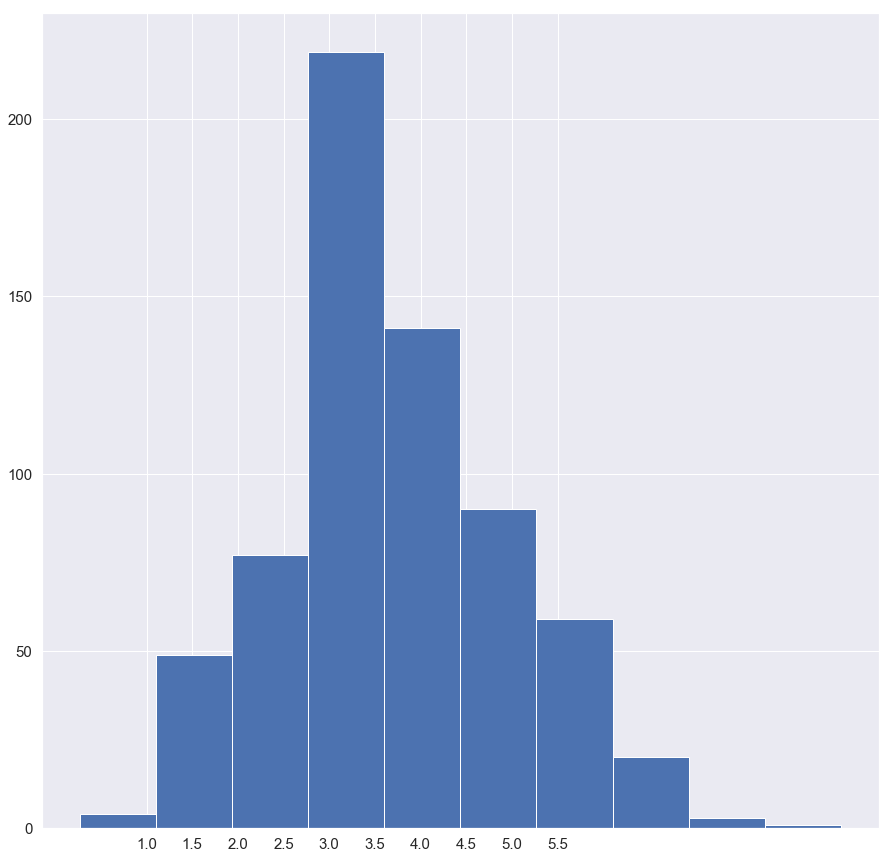

In [64]:
plt.figure(figsize=(15,15))
plt.hist(DFa['target'])
plt.xticks(np.arange(1, 6, step=0.5),fontsize=15)
plt.yticks(fontsize=15)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text xticklabel objects>)

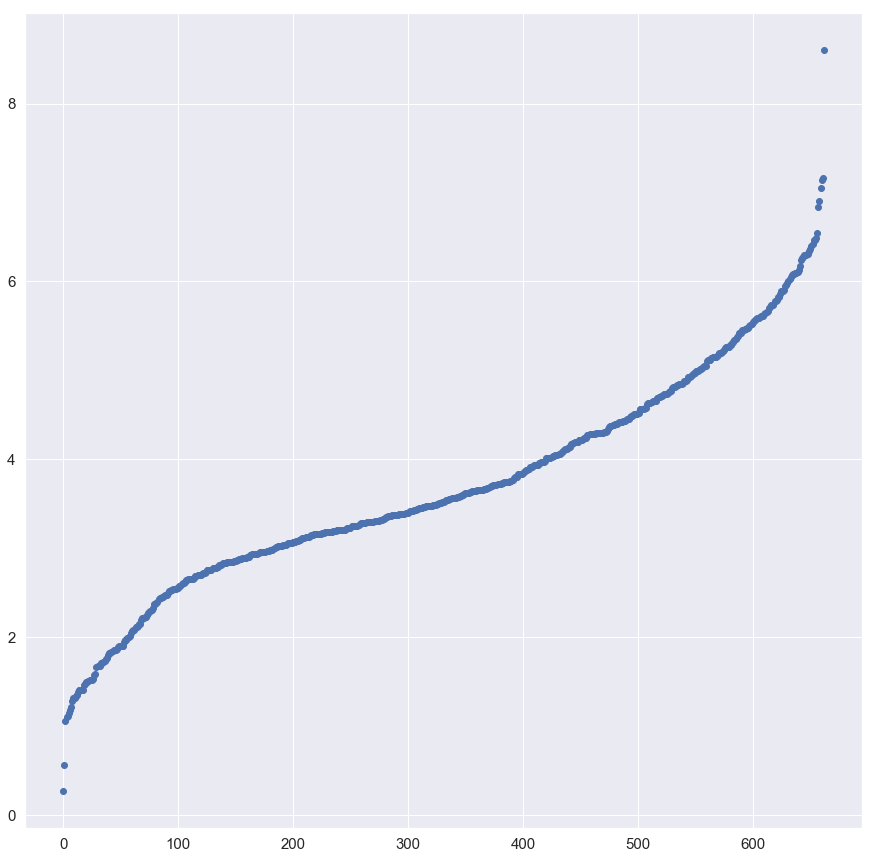

In [65]:
plt.figure(figsize=(15,15))
plt.scatter(np.arange(0,663),DFa['target'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [66]:
#Function that plots rows on y and column labels on x
def Plot(x):
    plt.figure(figsize=(20,10))
    plt.plot([round(x) for x in list(DFa.columns[:-1].astype(float))],x.iloc[:,:-1].T)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.xlabel('Wavelength in nm',fontsize=30)
    

In [67]:
def snv(y):
    x=y.copy(deep=True)
    for i in range(x.shape[0]):
        x.iloc[i,:-1] = (x.iloc[i,:-1] - np.mean(x.iloc[i,:-1])) / np.std(x.iloc[i,:-1])
    return x

#### Multiplicative Scatter Correction

In [68]:
def msc(input_data_, reference=None):
    
    # mean centre correction
    input_data=input_data_.values[:,:-1]
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:-1].mean()

    ref = np.mean(input_data, axis=0)
    

    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
    p=pd.DataFrame(data_msc,columns=input_data_.columns[:-1])
    p['target']=input_data_['target']
    return (p)

#### Derivative Smoothening

In [69]:
def deriv(x,y):
    a=x.copy(deep=True)
    a.iloc[:,:-1] = savgol_filter(a.iloc[:,:-1], 25, polyorder = 3,deriv=y)
    
    return a

# Visualization of Spectral Preprocessing

(0.3, 1)

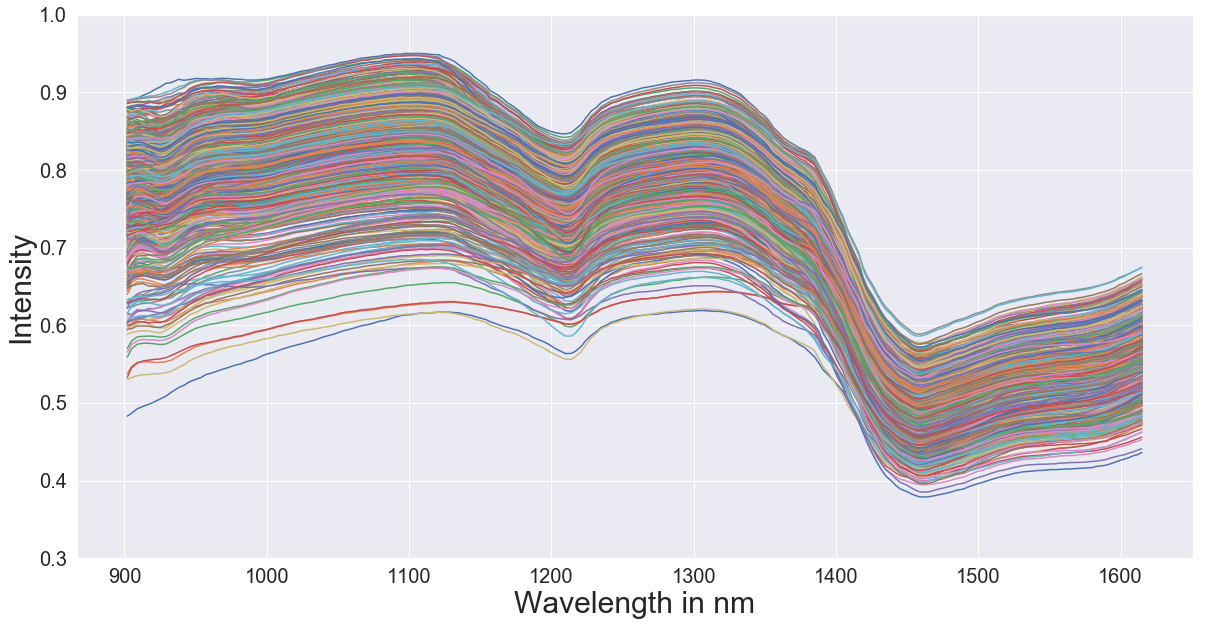

In [71]:
Plot(DFa)
plt.ylabel('Intensity',fontsize=30)
plt.ylim(0.3,1)

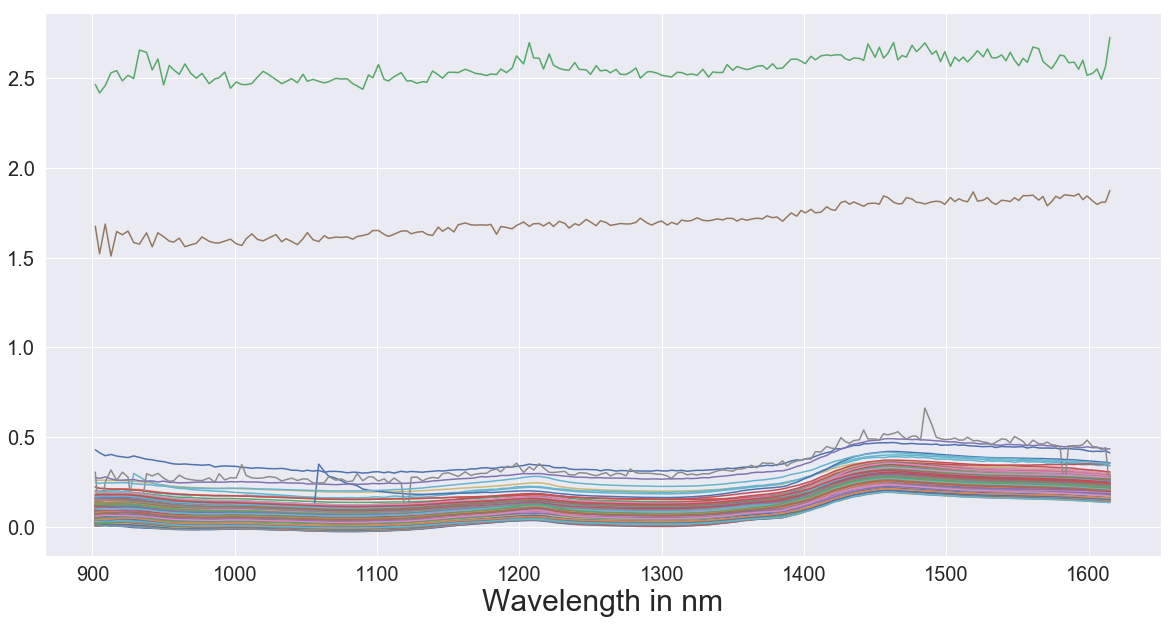

In [81]:
Plot(DFr)

In [84]:
pd.set_option('display.max_columns', None)

In [154]:
a=DFr.sort_values(by=['1502.5493907567386']).reset_index(drop=True).iloc[:599,:]

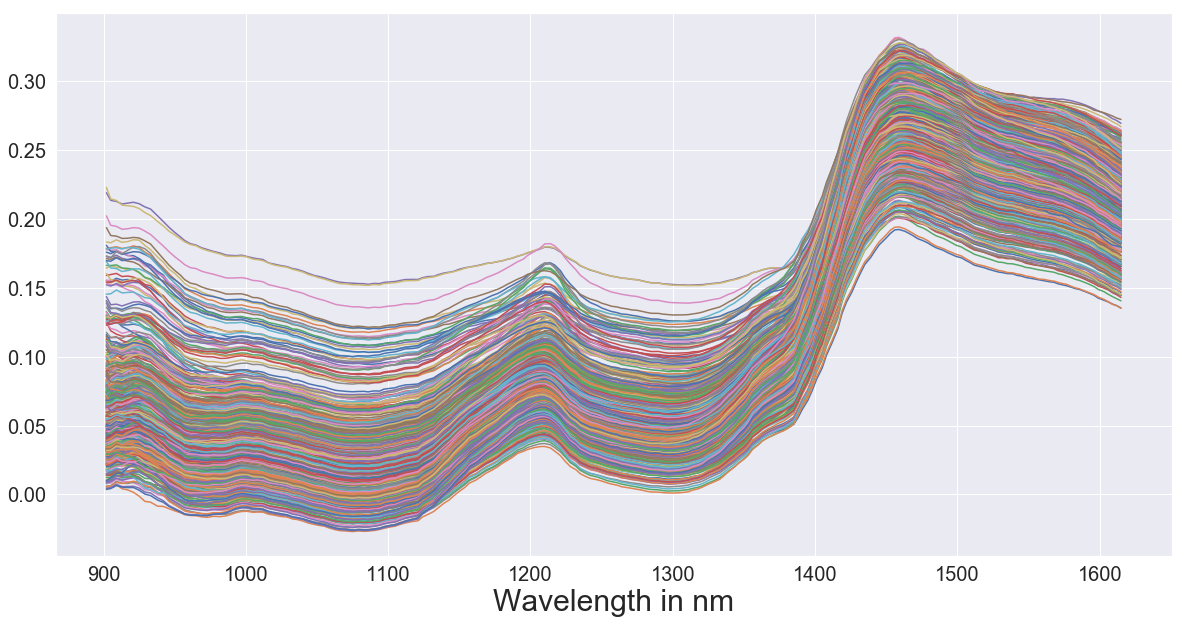

In [86]:
Plot(DFr.sort_values(by=['1502.5493907567386']).reset_index(drop=True).iloc[:599,:])

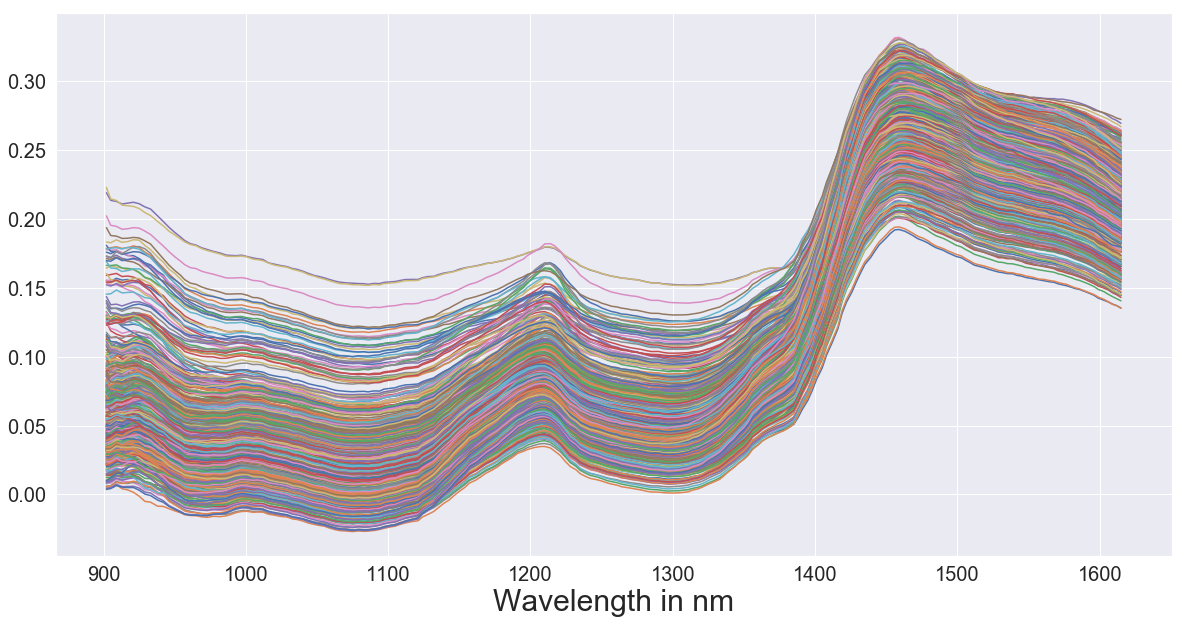

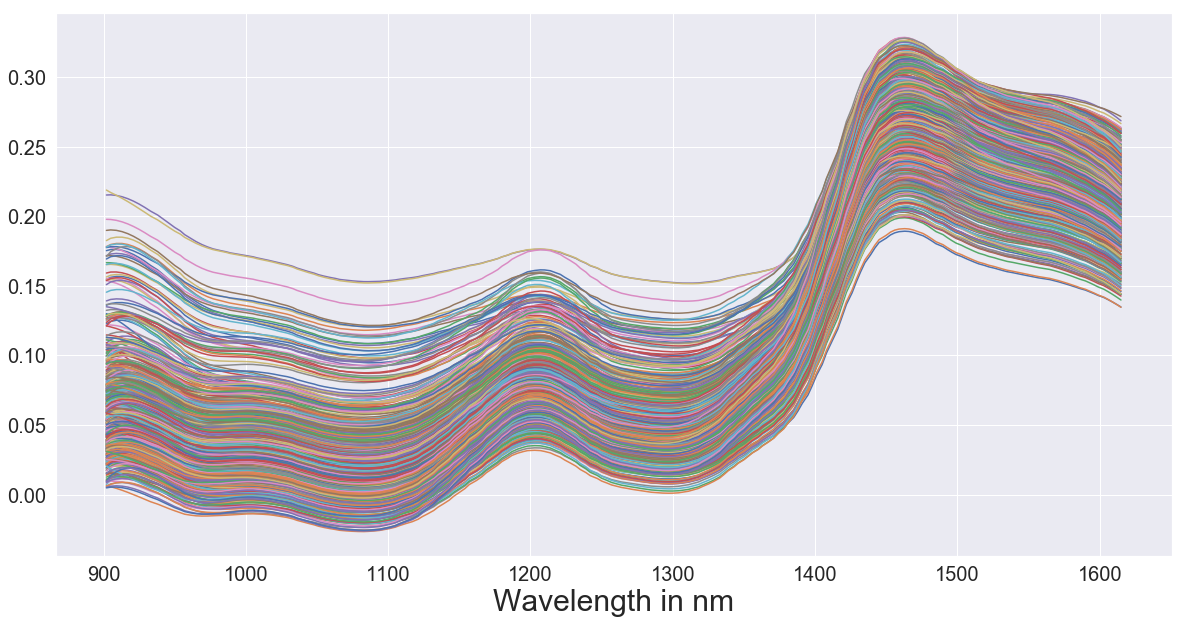

In [130]:
Plot(a)
Plot(deriv(a,0))

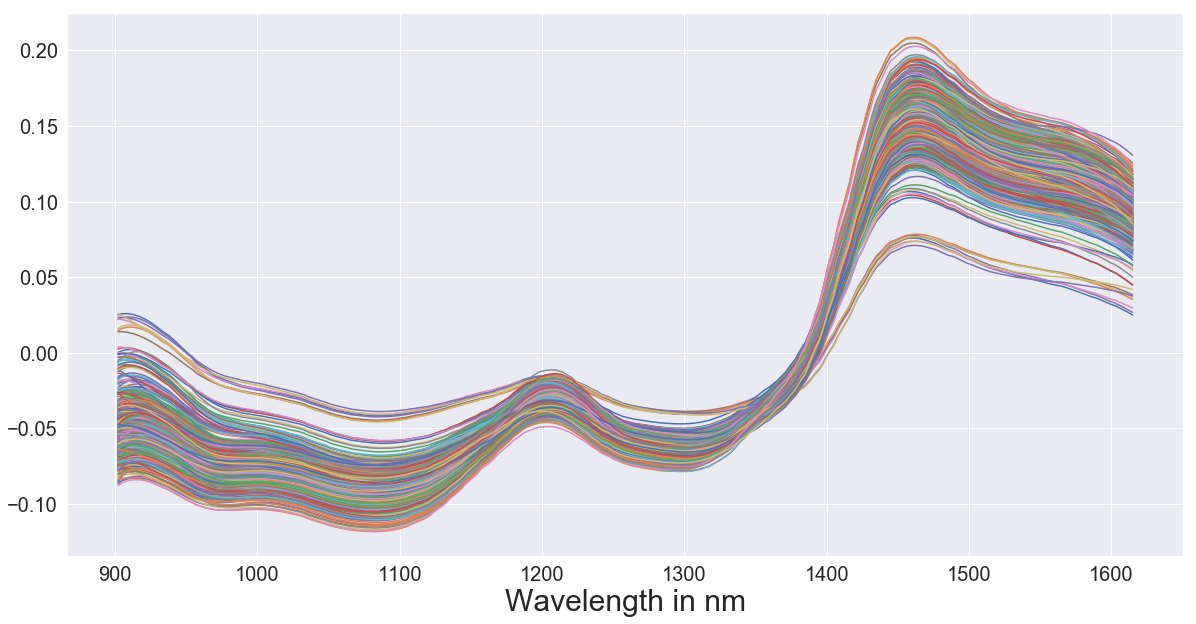

In [91]:
Plot(deriv(a,0))

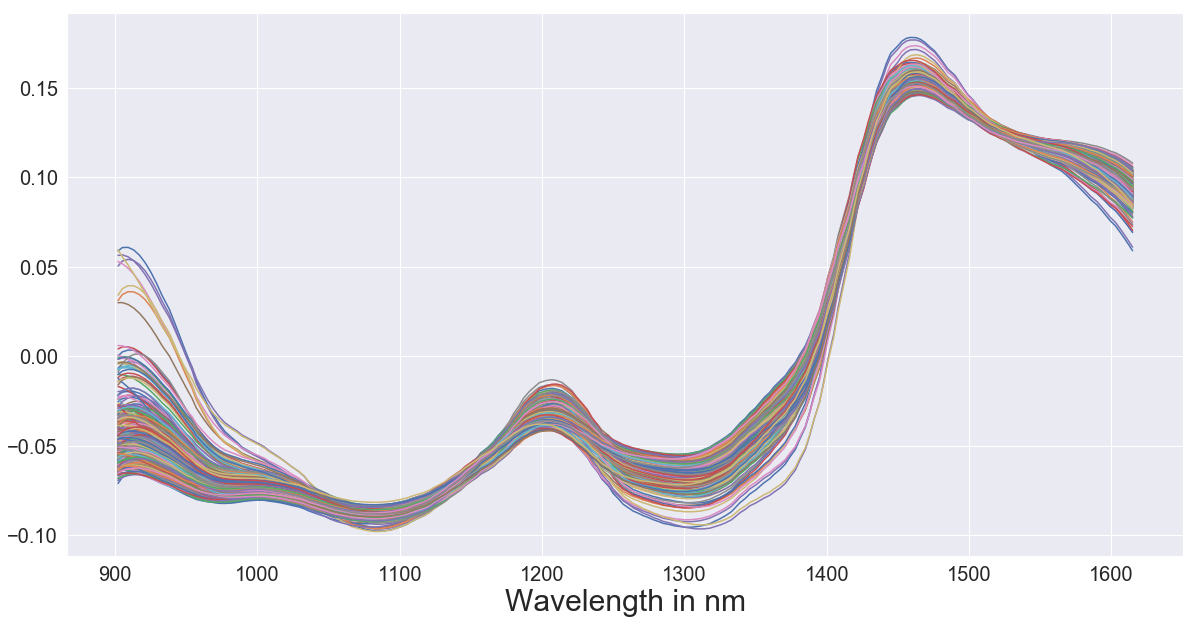

In [128]:
Plot(msc(deriv(a,0)))

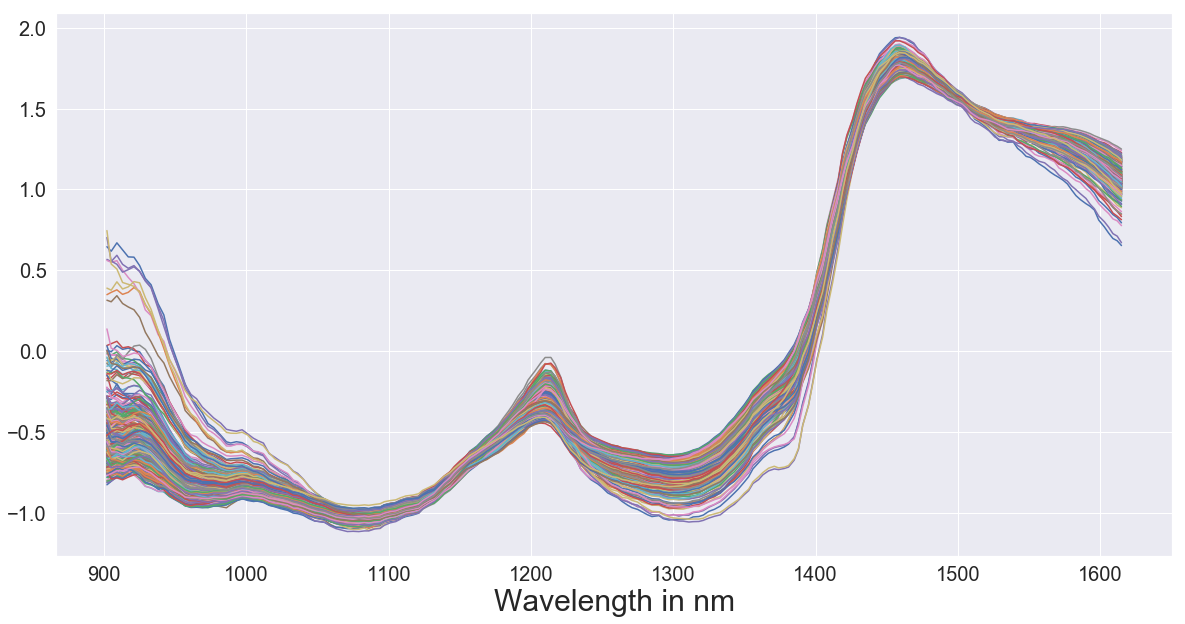

In [88]:
Plot(snv(a))

Text(0, 0.5, 'Reflectance')

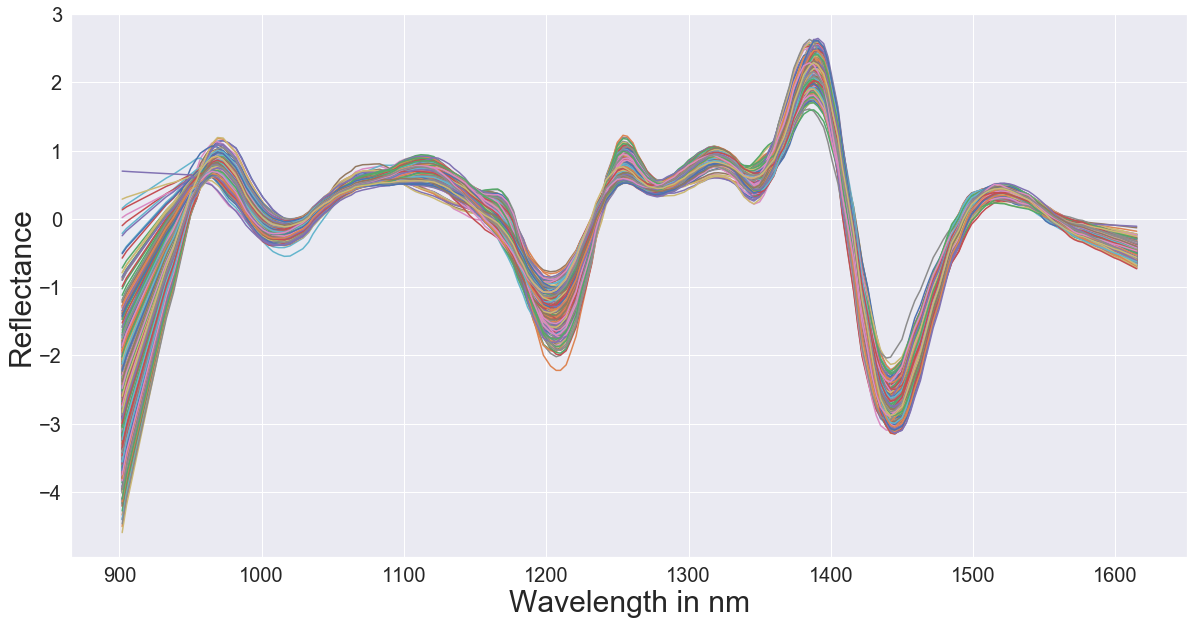

In [129]:
Plot(snv(msc(deriv(a,2))))
plt.ylabel('Reflectance',fontsize=30)


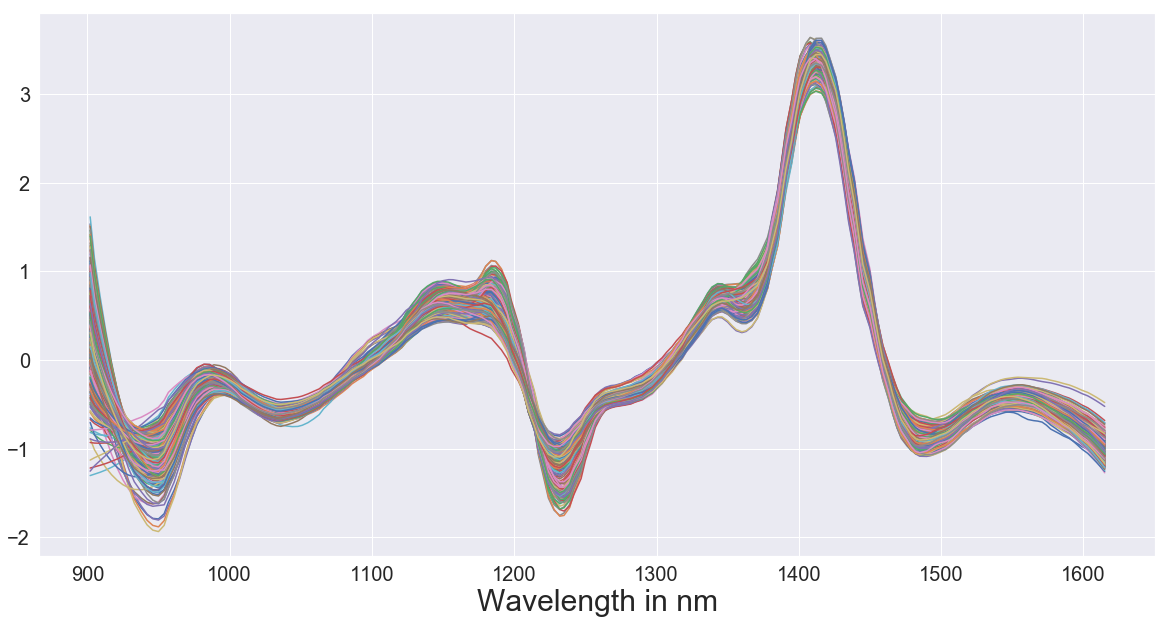

In [132]:
Plot(snv(msc(deriv(a,1))))


Text(0, 0.5, 'Intensity')

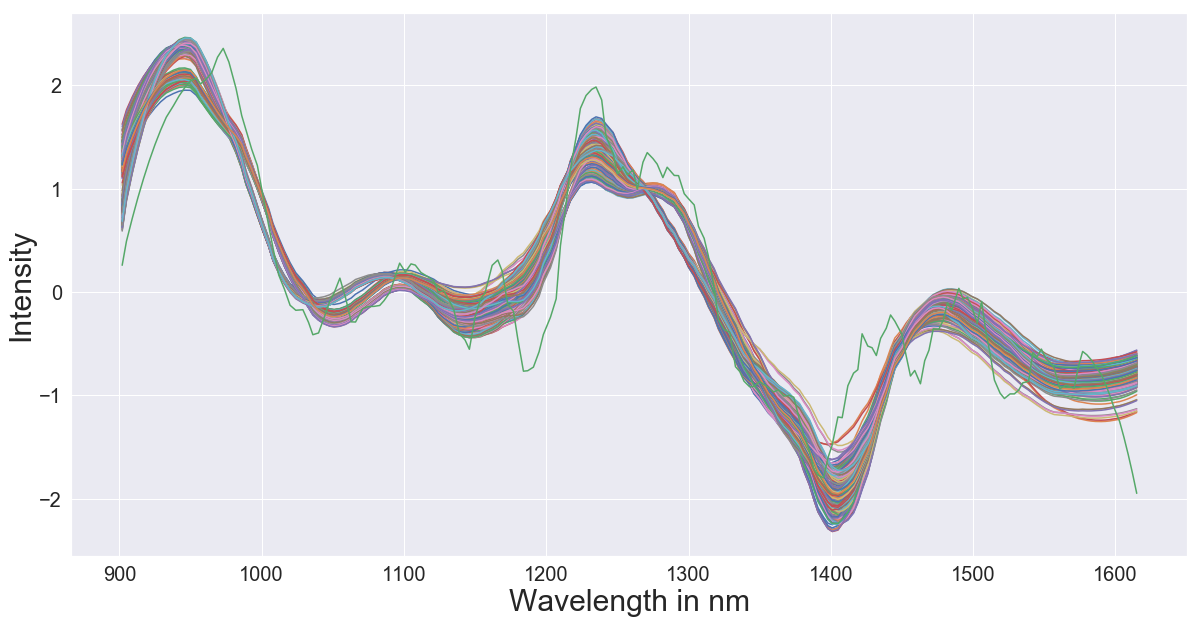

In [191]:
Plot(snv(msc(deriv(DF,1))))
plt.ylabel('Intensity',fontsize=30)

Text(0, 0.5, 'Variance At Each Wavelength')

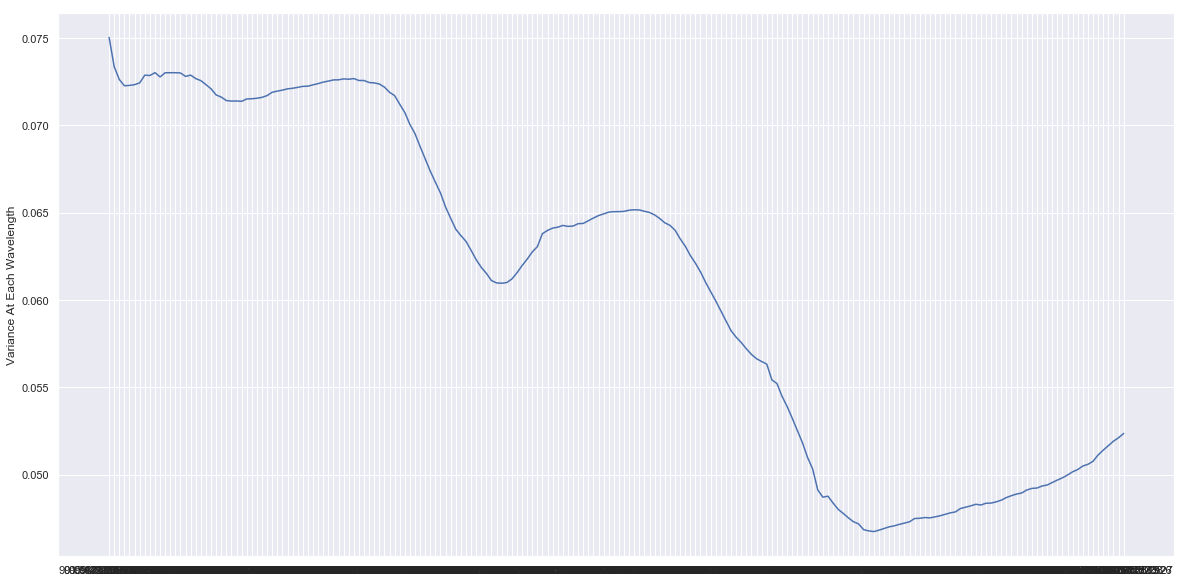

In [122]:
plt.figure(figsize=(20,10))
plt.plot(DFa.iloc[:,:-1].std())
plt.ylabel('Variance At Each Wavelength')
# change to std/mu

Text(0.5, 0, 'Wavelength')

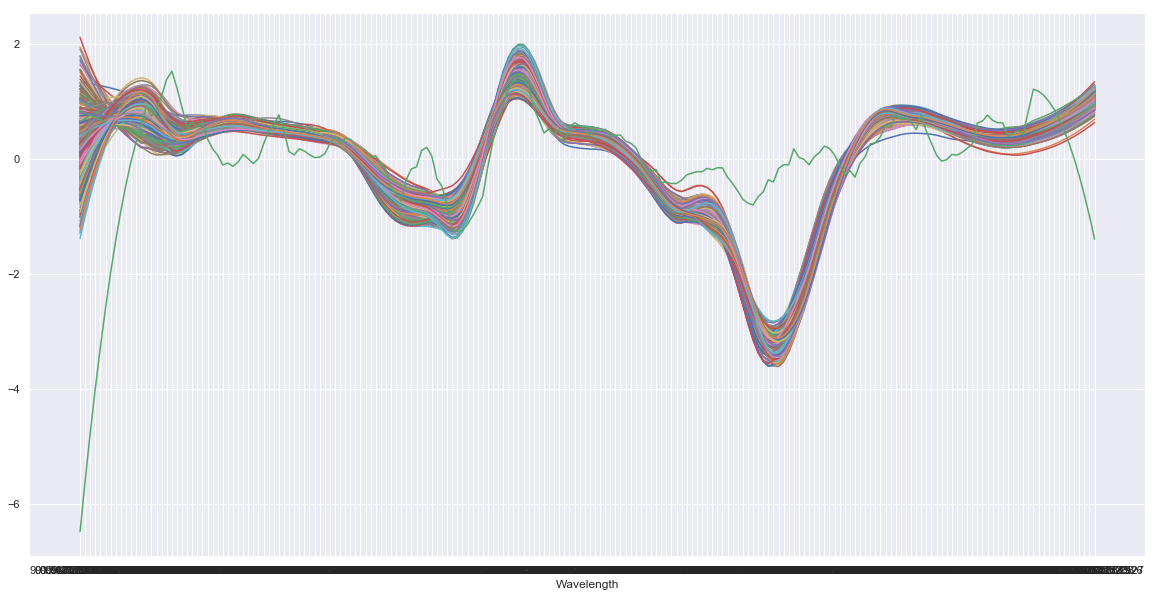

In [125]:
Plot(snv(msc(deriv(DFa,1))))
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

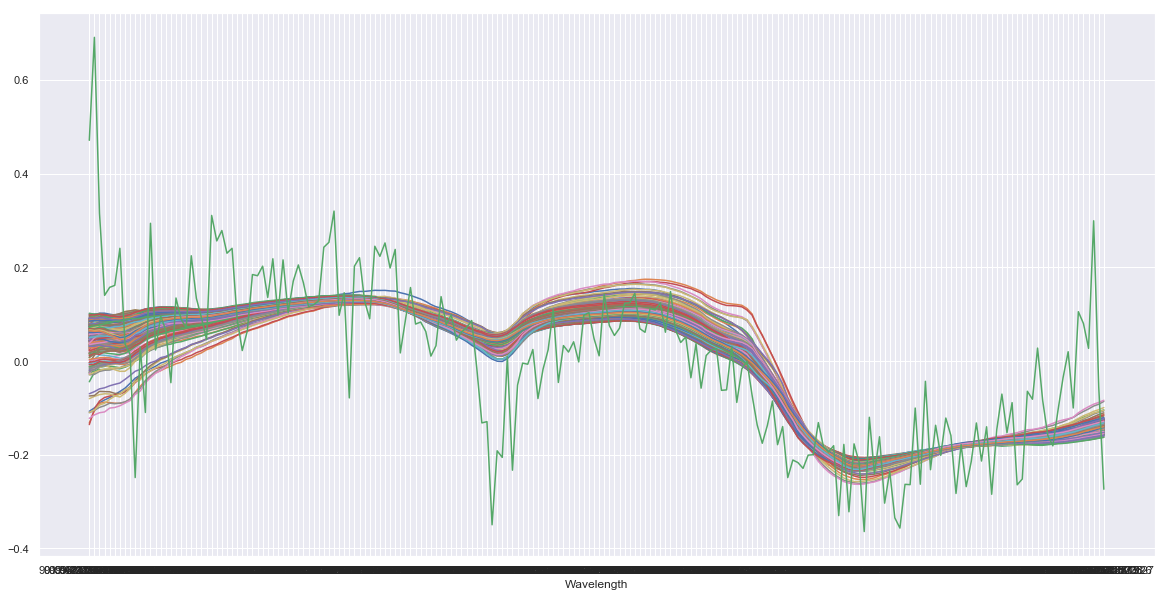

In [123]:
Plot(msc(DFa))
plt.xlabel('Wavelength')

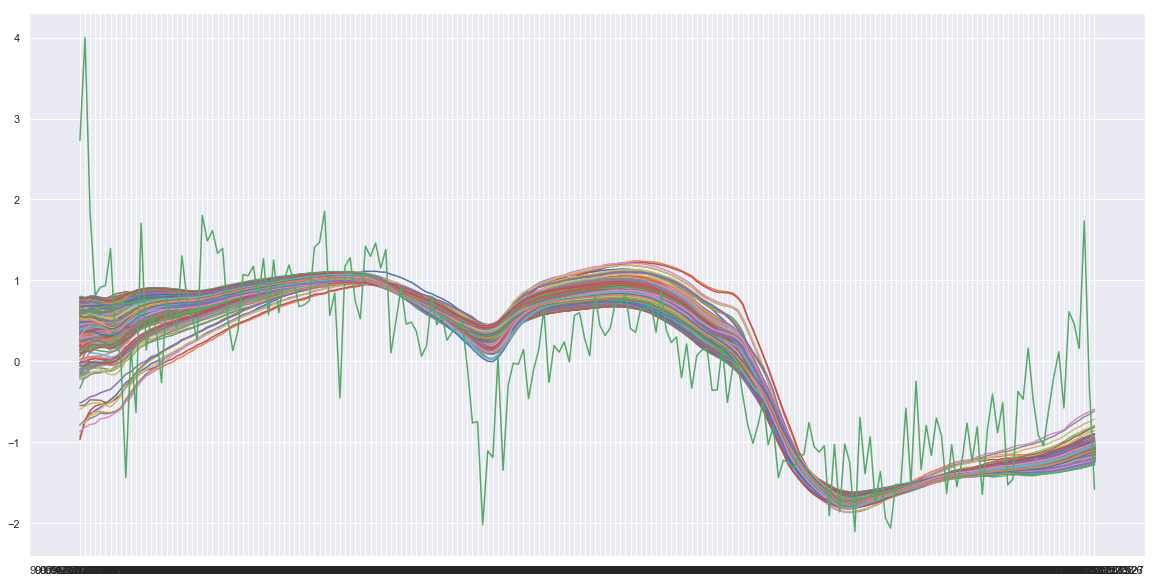

In [124]:
Plot(snv(DFa))

# Principal Components Analysis

In [213]:
def solve_pca(x,n):
    plt.figure(figsize=(15,15))
    pca=PCA(n_components=n)
    y=pca.fit_transform(x.iloc[:,:-1])
    y_pca=pd.concat([pd.DataFrame(data=y,columns=['PC1','PC2']),x['target']],axis=1)
    y_pca.plot.scatter(x='PC1',y='PC2',c='target',s=60,edgecolors='k')
    

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


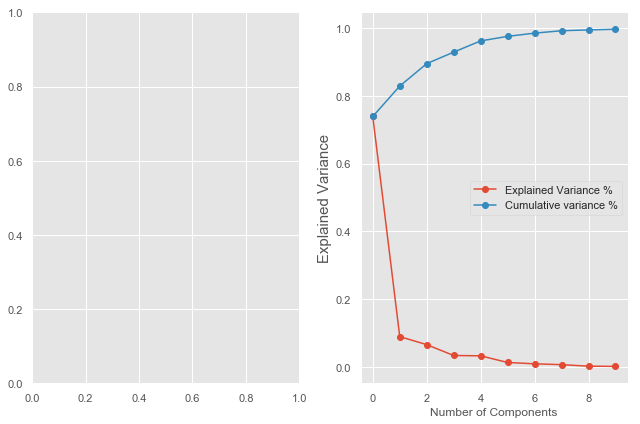

In [199]:
pca=PCA(n_components=10)

DF_pca=pca.fit(snv(msc(deriv(DFa,2))).iloc[:,:-1])

expl_var = DF_pca.explained_variance_ratio_

with plt.style.context(('ggplot')):
    fig, (ax2, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(expl_var,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("Number of Components")
    plt.ylabel('Explained Variance', fontsize=15)
    
   
   
 
    plt.legend()
    plt.show()

### Therefore we take first 2 principal components to model the data

(-2.2, 4)

<Figure size 1440x1440 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

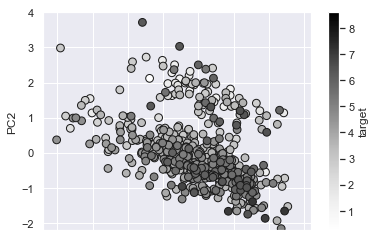

In [214]:
plt.figure(figsize=(20,20))
solve_pca(msc(snv(deriv(DFa,2))),2)
plt.xlim(-11,8)
plt.ylim(-2.2,4)

#### There isn't much classification obtained through this method

# Principal Component Regression

In [286]:
def pcr(a,pc):
    
    X=a.iloc[:,:-1].copy(deep=True)
    y=a['target'].copy(deep=True)
    
    # Define the PCA object
    pca = PCA()
 
    # Preprocessing (1): first derivative
    #d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)
    d1X=X.copy(deep=True)
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    #Xstd = StandardScaler().fit_transform(d1X[:,:])
 
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(d1X)[:,:pc]
 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Fit
    regr.fit(Xreg, y)
 
    # Calibration
    y_c = regr.predict(Xreg)
 
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    adjusted_r2=1-(1-r2_score(y,y_cv))*((X.shape[0]-1)/(X.shape[0]-pc-1))
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    
    #plt.figure(figsize=(8,8))
    #plt.scatter(y,y_cv)
    #plt.title('$R^{2}$ (CV): '+str(score_cv))
    #plt.xlim(1.6,3.1)
    #plt.ylim(1.6,3.1)
    
    return(y_cv, score_c, score_cv, mse_c, mse_cv,adjusted_r2)

In [287]:
pcr(snv(msc(deriv(DFa,1))),15)[1:]

(0.9889569509226738,
 0.9654253007412145,
 0.017141530416818047,
 0.05366844381898784,
 0.9644589271594471)

Current Progress 4.44 %
Current Progress 6.67 %
Current Progress 8.89 %
Current Progress 11.11 %
Current Progress 13.33 %
Current Progress 15.56 %
Current Progress 17.78 %
Current Progress 20.0 %
Current Progress 22.22 %
Current Progress 24.44 %
Current Progress 26.67 %
Current Progress 28.89 %
Current Progress 31.11 %
Current Progress 33.33 %
Current Progress 35.56 %
Current Progress 37.78 %
Current Progress 40.0 %
Current Progress 42.22 %
Current Progress 44.44 %
Current Progress 46.67 %
Current Progress 48.89 %
Current Progress 51.11 %
Current Progress 53.33 %
Current Progress 55.56 %
Current Progress 57.78 %
Current Progress 60.0 %
Current Progress 62.22 %
Current Progress 64.44 %


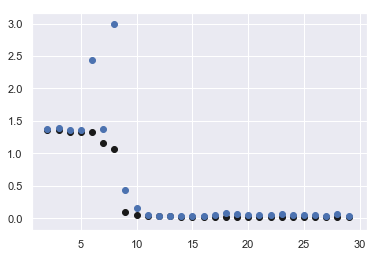

In [259]:
for i in range(2,30):
    plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[3],c='k')
    plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[4],c='b')
    print('Current Progress',np.round(i/45*100,2),'%')
    

In [298]:
def plot_r2_pca(x,n):    
    plt.figure(figsize=(15,15))
    plt.scatter(x['target'],pcr(snv(msc(deriv(x,1))),n)[0])
    plt.title('$R^{2}$ (CV): '+str(pcr(snv(msc(deriv(x,1))),n)[2]))
    plt.xlim(0,7.5)
    plt.ylim(0,7.5)
    plt.xlabel('True Value',fontsize=20)
    plt.ylabel('Predicted Value',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

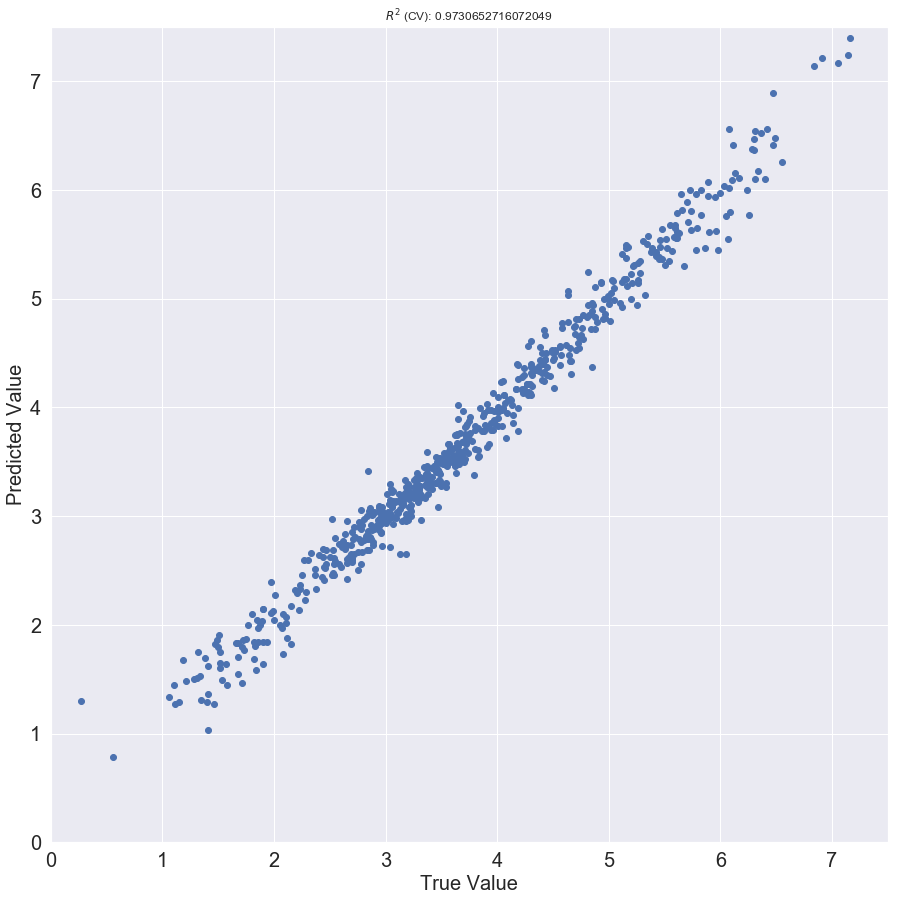

In [299]:
plot_r2_pca(DFa,15)

In [300]:
def plot_adjr2_pca(x,n):    
    plt.figure(figsize=(11,11))
    plt.scatter(x['target'],pcr(snv(msc(deriv(x,1))),n)[0])
    plt.title('$R^{2}$ (CV): '+str(pcr(snv(msc(deriv(x,1))),n)[2].round(3))+'  Adjusted $R^{2}$ (CV): '+str(pcr(snv(msc(deriv(x,1))),n)[5].round(3)))
    plt.xlim(0,7.5)
    plt.ylim(0,7.5)
    plt.xlabel('True Value',fontsize=20)
    plt.ylabel('Predicted Value',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

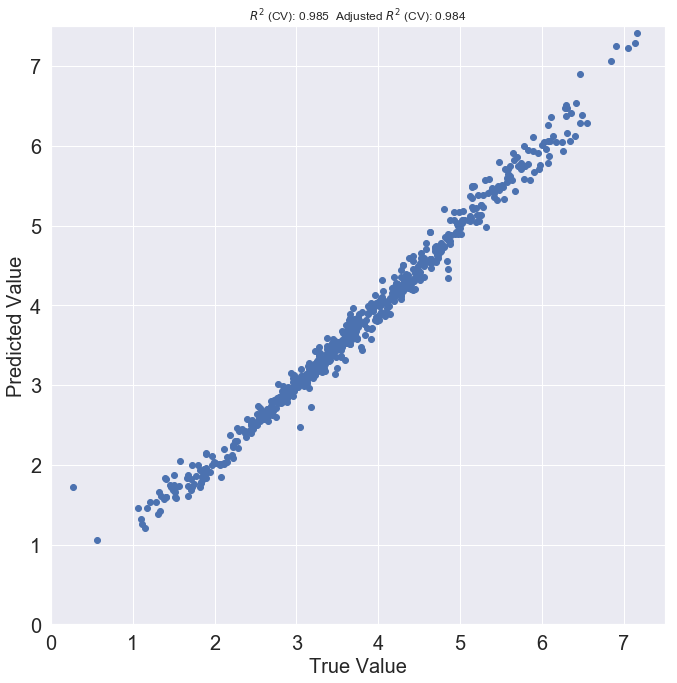

In [301]:
plot_adjr2_pca(DFa,33)

Text(0, 0.5, 'R2')

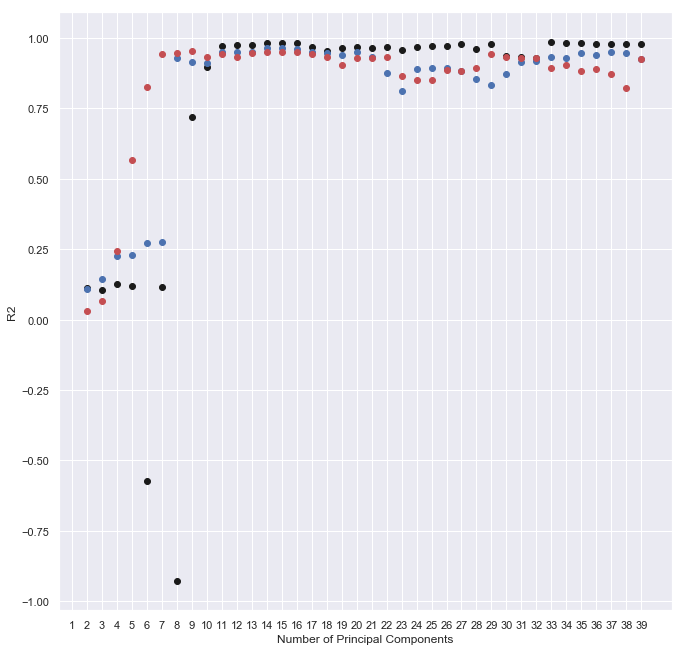

In [235]:
plt.figure(figsize=(11,11))
for i in range(2,40):
    plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[2],c='k')
    plt.scatter(i,pcr(snv(msc(deriv(DFa,2))),i)[2],c='b')
    plt.scatter(i,pcr(snv(msc(deriv(DFa,3))),i)[2],c='r')
plt.xticks(np.arange(1,40))
plt.xlabel('Number of Principal Components')
plt.ylabel('R2')

(0, 1)

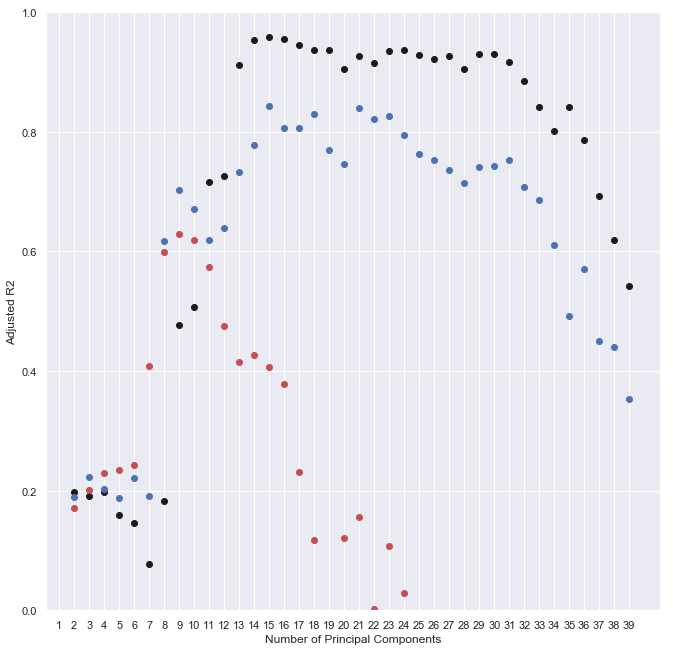

In [68]:
plt.figure(figsize=(11,11))
for i in range(2,40):
    plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[5],c='k')
    plt.scatter(i,pcr(snv(msc(deriv(DFa,2))),i)[5],c='b')
    plt.scatter(i,pcr(snv(msc(deriv(DFa,3))),i)[5],c='r')
plt.xticks(np.arange(1,40))
plt.xlabel('Number of Principal Components')
plt.ylabel('Adjusted R2')
plt.ylim(0,1)

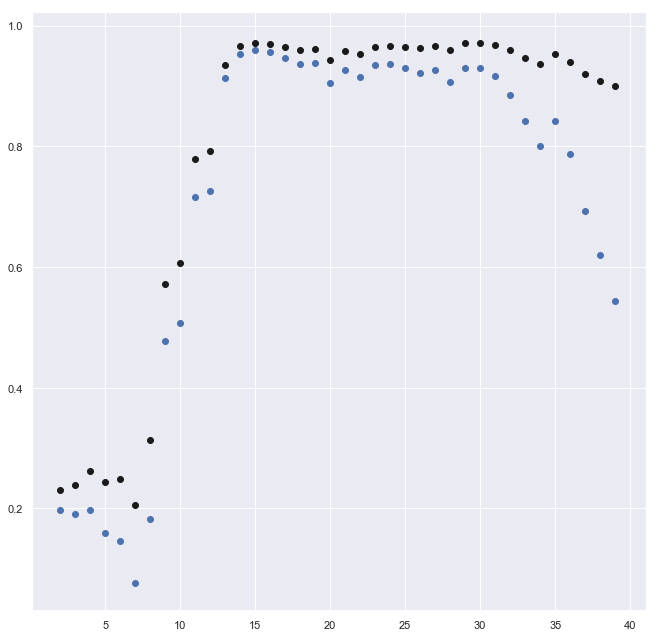

In [69]:
plt.figure(figsize=(11,11))
for i in range(2,40):
    plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[5],c='b')
    plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[2],c='k')

Text(0, 0.5, 'MSE')

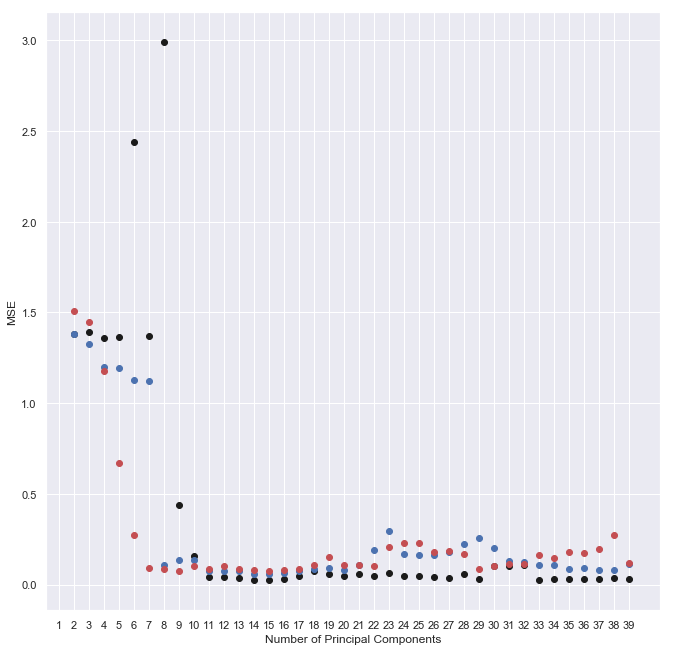

In [241]:
plt.figure(figsize=(11,11))
for i in range(2,40):
        plt.scatter(i,pcr(snv(msc(deriv(DFa,1))),i)[4],c='k')
        plt.scatter(i,pcr(snv(msc(deriv(DFa,2))),i)[4],c='b')
        plt.scatter(i,pcr(snv(msc(deriv(DFa,3))),i)[4],c='r')
plt.xticks(np.arange(1,40))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')

# Partial Least Squares Regression

In [101]:
from sklearn.cross_decomposition import PLSRegression

In [116]:
def pls(a,pc):
    
    X=a.iloc[:,:-1].copy(deep=True)
    y=a['target'].copy(deep=True)
    
    # Define the PCA object
    pls = PLSRegression(n_components=pc)

   
 

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=model_selection.LeaveOneOut())
    
 
    # Calculate scores for calibration and cross-validation
    
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
   
    mse_cv = mean_squared_error(y, y_cv)
    adjusted_r2=1-(1-r2_score(y,y_cv))*((X.shape[0]-1)/(X.shape[0]-pc-1))
    
    
    #plt.figure(figsize=(8,8))
    #plt.scatter(y,y_cv)
    #plt.title('$R^{2}$ (CV): '+str(score_cv))
    #plt.xlim(1.6,3.1)
    #plt.ylim(1.6,3.1)
    
    return(y_cv, score_cv, mse_cv,adjusted_r2)

In [103]:
def plot_r2_pls(x,n):    
    plt.figure(figsize=(15,15))
    plt.scatter(DF['target'],pls(snv(msc(deriv(x,1))),n)[0])
    plt.title('$R^{2}$ (CV): '+str(pls(snv(msc(deriv(x,1))),n)[1]))
    plt.xlim(0,7.5)
    plt.ylim(0,7.5)

In [134]:
pls(a,8)[1]

0.9584525346058587

In [135]:
pls(msc(a),8)[1]

0.973902427269484

In [136]:
pls(msc(deriv(a,1)),8)[1]

0.9876857566615329

In [137]:
pls(snv(msc(deriv(a,1))),8)[1]

0.9879768707106652

In [ ]:
plt.scatter(a.iloc[:,-1],pls(a,9)[0])


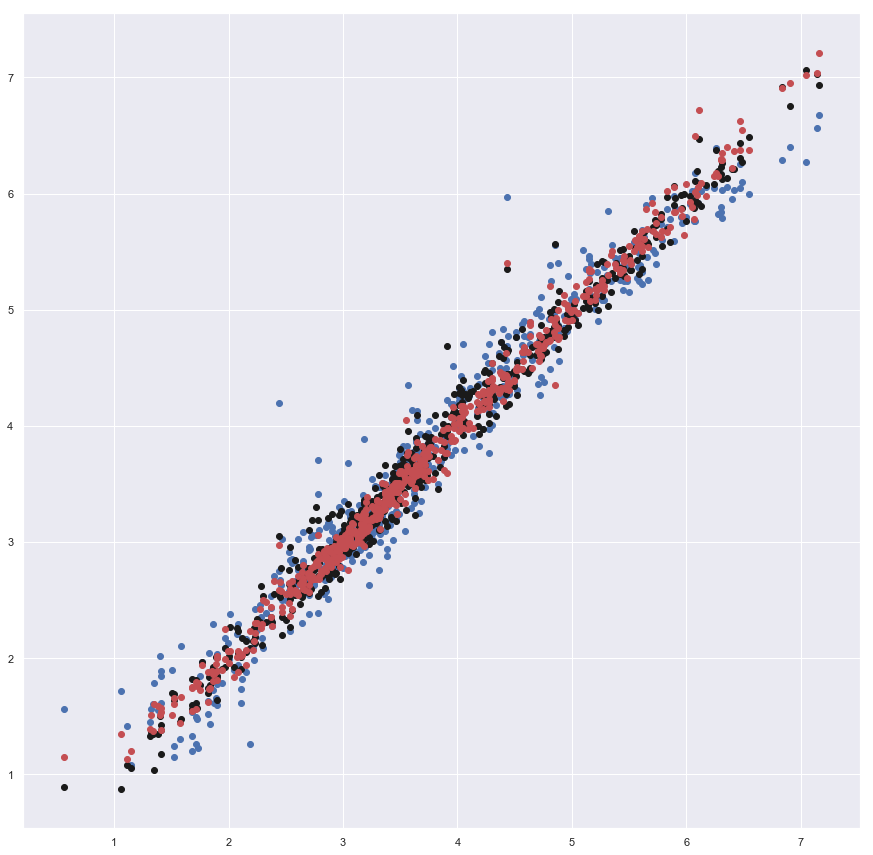

In [142]:
plt.figure(figsize=(15,15))
plt.scatter(a.iloc[:,-1],pls(a,9)[0],c='b')
plt.scatter(a.iloc[:,-1],pls(msc(a),9)[0],c='k')
plt.scatter(a.iloc[:,-1],pls(msc(deriv(a,1)),9)[0],c='r')

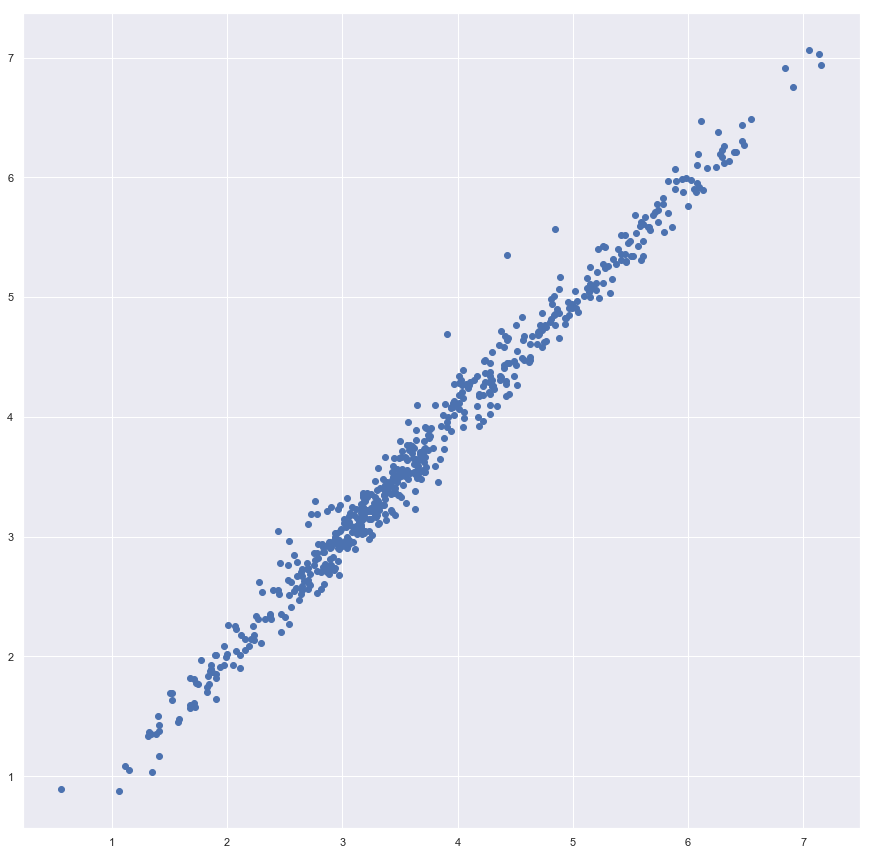

In [140]:
plt.figure(figsize=(15,15))
plt.scatter(a.iloc[:,-1],pls(msc(a),9)[0])

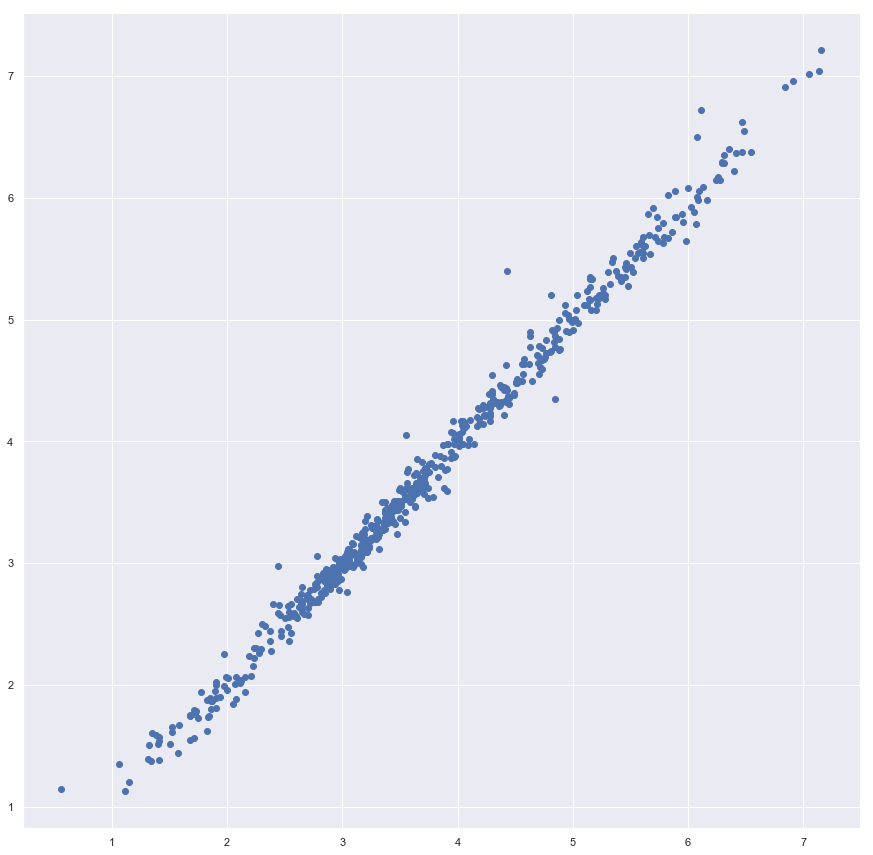

In [139]:
plt.figure(figsize=(15,15))
plt.scatter(a.iloc[:,-1],pls(msc(deriv(a,1)),9)[0])

In [255]:
def plot_adjr2_pls(x,n):    
    plt.figure(figsize=(15,15))
    plt.scatter(DF['target'],pls(snv(msc(deriv(x,1))),n)[0])
    plt.title('$R^{2}$ (CV): '+str(pls(snv(msc(deriv(x,1))),n)[1].round(2))+'  Adjusted $R^{2}$ (CV): '+str(pls(snv(msc(deriv(x,1))),n)[3].round(2)))
    plt.xlim(0,7.5)
    plt.ylim(0,7.5)
    

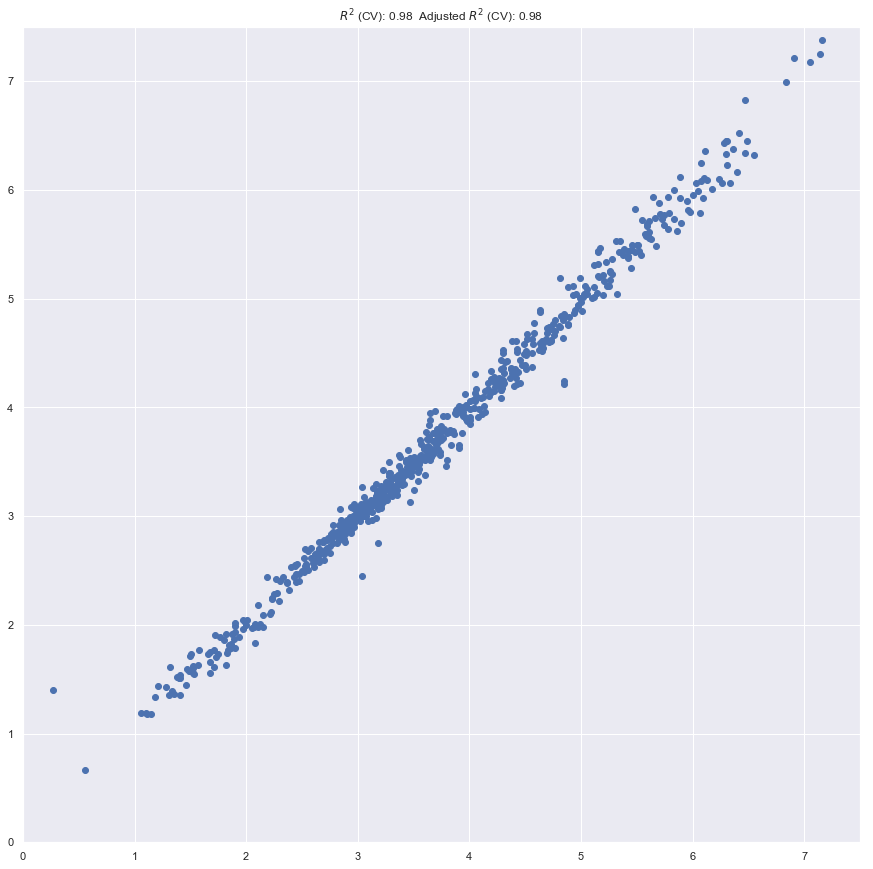

In [256]:
plot_adjr2_pls(DFa,17)

Current Progress 97.78 %


Text(0, 0.5, 'R2')

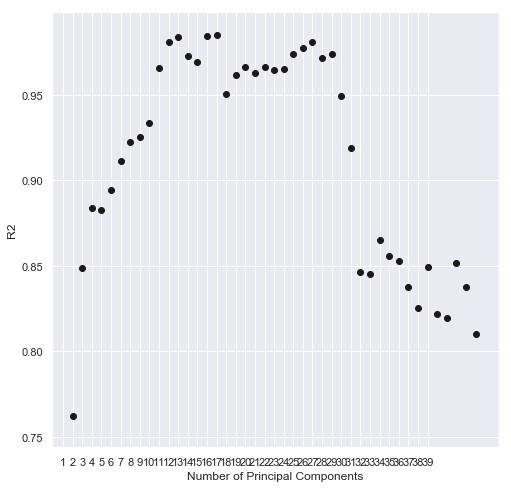

In [252]:
plt.figure(figsize=(8,8))
for i in range(2,45):
    clear_output(wait=True)
    plt.scatter(i,pls(snv(msc(deriv(DFa,1))),i)[1],c='k')
    #plt.scatter(i,pls(snv(msc(deriv(DFa,2))),i)[1],c='b')
    #plt.scatter(i,pls(snv(msc(deriv(DFa,3))),i)[1],c='r')
    print('Current Progress',np.round(i/45*100,2),'%')
plt.xticks(np.arange(1,40))
plt.xlabel('Number of Principal Components')
plt.ylabel('R2')

In [ ]:
plt.figure(figsize=(8,8))
for i in range(2,45):
    plt.scatter(i,pls(snv(msc(deriv(DFa,1))),i)[3],c='k')
    plt.scatter(i,pls(snv(msc(deriv(DFa,2))),i)[3],c='b')
    plt.scatter(i,pls(snv(msc(deriv(DFa,3))),i)[3],c='r')
plt.xticks(np.arange(1,40))
plt.ylim(0,1)
plt.xlabel('Number of Principal Components')
plt.ylabel('Adjusted R2')

In [ ]:
plt.figure(figsize=(8,8))
for i in range(2,40):
    plt.scatter(i,pls(snv(msc(deriv(DFa,1))),i)[2],c='k')
    plt.scatter(i,pls(snv(msc(deriv(DFa,2))),i)[2],c='b')
    plt.scatter(i,pls(snv(msc(deriv(DFa,3))),i)[2],c='r')
plt.xticks(np.arange(1,40))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')

# Visualizing Variable Selection

(-2, 5)

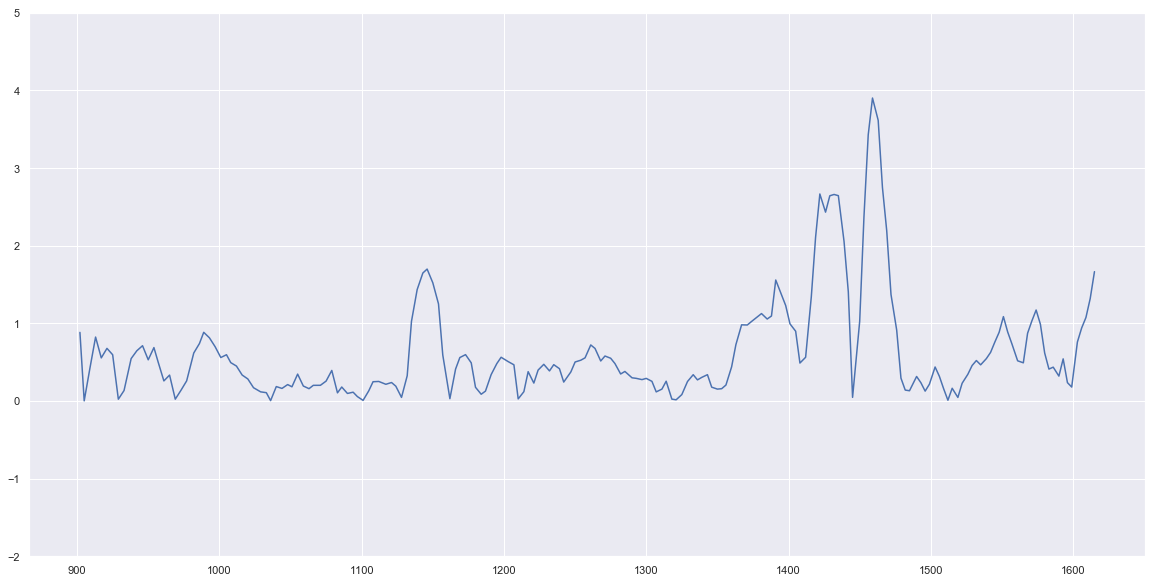

In [297]:

def pls_variable_selection(a, b, max_comp):
    
    X=a.copy(deep=True)
    y=b.copy(deep=True)
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

pls_=PLSRegression(n_components=14)

pls_.fit(DFa.iloc[:,:-1],DFa['target'])

plt.figure(figsize=(20,10))
plt.plot([round(x) for x in list(DFa.columns[:-1].astype(float))],np.abs(pls_.coef_[:,0]))
#plt.plot(DF.columns[:-1],snv(DFa.iloc[:,:-1]).T)
plt.ylim(-2,5)

# XGBoost

In [31]:
import xgboost as xgb

In [32]:
xg_reg = xgb.XGBRegressor(silent=True, 
                          scale_pos_weight=1,
                          learning_rate=0.01,  
                          colsample_bytree = 0.4,
                          subsample = 0.8,
                          n_estimators=1000, 
                          reg_alpha = 0.3,
                          max_depth=4, 
                          gamma=10)

In [33]:
y_cv = cross_val_predict(xg_reg, snv(deriv(DF.iloc[:,:-1],1)), DF['target'], cv=model_selection.LeaveOneOut())

r2_score(DF['target'],y_cv)

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


KeyboardInterrupt: 

In [ ]:

xgb1 = xgb.XGBRegressor()
parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

#{'nthread':[4], #when use hyperthread, xgboost may become slower
#              'objective':['reg:linear'],
#              'learning_rate': [.03, 0.05, .07], #so called `eta` value
#              'max_depth': [5, 6, 7],
#              'min_child_weight': [4],
#              'silent': [1],
#              'subsample': [0.7],
#              'colsample_bytree': [0.7],
#              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(DF.iloc[:,:-1],DF['target'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

# Neural Networks

In [49]:
DFa.to_excel('Abs_Turmeric.xlsx')

In [34]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
model=tf.keras.Sequential([
    
    layers.Dense(100,activation=tf.nn.relu,input_shape=[len(DF.columns[:-1])]),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [42]:
model.fit(snv(msc(deriv(DFa.iloc[:600,:],1))).iloc[:,:-1],DFa.iloc[:600,-1], validation_split=0.2, epochs=100, batch_size= 10)

Train on 480 samples, validate on 120 samples
Epoch 1/100
480/480 [==============================] - 0s 171us/sample - loss: 1.7596 - mean_squared_error: 1.7596 - val_loss: 3.0319 - val_mean_squared_error: 3.0319
Epoch 2/100
480/480 [==============================] - 0s 167us/sample - loss: 0.5671 - mean_squared_error: 0.5671 - val_loss: 3.0816 - val_mean_squared_error: 3.0816
Epoch 3/100
480/480 [==============================] - 0s 169us/sample - loss: 0.5461 - mean_squared_error: 0.5461 - val_loss: 3.3689 - val_mean_squared_error: 3.3689
Epoch 4/100
480/480 [==============================] - 0s 167us/sample - loss: 0.5244 - mean_squared_error: 0.5244 - val_loss: 2.9236 - val_mean_squared_error: 2.9236
Epoch 5/100
480/480 [==============================] - 0s 169us/sample - loss: 0.4930 - mean_squared_error: 0.4930 - val_loss: 3.5924 - val_mean_squared_error: 3.5924
Epoch 6/100
480/480 [==============================] - 0s 169us/sample - loss: 0.4602 - mean_squared_error: 0.4602 - va

Epoch 98/100
480/480 [==============================] - 0s 155us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.9250 - val_mean_squared_error: 0.9250
Epoch 99/100
480/480 [==============================] - 0s 144us/sample - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.7217 - val_mean_squared_error: 0.7217
Epoch 100/100
480/480 [==============================] - 0s 150us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.5081 - val_mean_squared_error: 0.5081


In [44]:
y_pred=model.predict(snv(msc(deriv(DFa.iloc[601:,:],1))).iloc[:,:-1])

In [45]:
r2_score(DFa.iloc[601:,-1],y_pred)

-10.02586344489033

(4, 6)

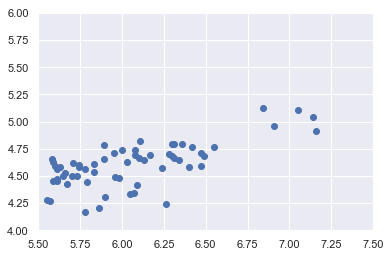

In [47]:
plt.scatter(DFa.iloc[601:,-1],y_pred)
plt.xlim(5.5,7.5)
plt.ylim(4,6)

In [ ]:
model.summary()

In [ ]:
snv(msc(deriv(DF,1))).to_csv('preprocesseddata.csv',index=False)

# Decision Trees

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 

for x in range(1,DF.shape[1]):
    regressor = DecisionTreeRegressor(random_state = 0,max_depth=8,min_samples_split=2,max_features=x)  

    # Cross-validation
    y_cv = cross_val_predict(regressor,DF.iloc[:,:-1] , DF['target'], cv=model_selection.LeaveOneOut())

    y=DF['target']
    plt.scatter(x,r2_score(y,y_cv))
    # Calculate scores for calibration and cross-validation
    #print(x,r2_score(y, y_cv).round(2),mean_squared_error(y, y_cv).round(2))
    
 


In [ ]:
plt.scatter(y,y_cv)

# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = model_selection.LeaveOneOut(), n_jobs = -1, verbose = 2)
    

In [29]:
grid_search.fit(DF.iloc[:,:-1],DF['target'])
grid_search.best_params_

Fitting 663 folds for each of 288 candidates, totalling 190944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.5min


KeyboardInterrupt: 

In [30]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
rf=grid_search.best_estimator_

In [ ]:
y_cv = cross_val_predict(rf, DF.iloc[:,:-1],DF['target'], cv=model_selection.LeaveOneOut())

In [ ]:
plt.scatter(y,y_cv)

# Linear Discrimant Analysis

In [ ]:
DFa_binned=DFa.copy(deep=True)
DFa_binned['target']=pd.cut(DFa['target'],bins=[1.70,1.90,2.10,2.30,2.50,2.70,2.90,3.10,3.30],labels=[1,2,3,4,5,6,7,8])

In [ ]:
X=DFa_binned.iloc[:,:-1]
y=DFa_binned['target']

lda = LDA(n_components=3)
Xlda = lda.fit_transform(X,y)

In [ ]:
dataframe=pd.DataFrame(data=Xlda,columns=['LDA1','LDA2','LDA3'])

In [ ]:
dataframe['target']=DFa_binned['target']

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

# 3D Plot

In [ ]:
%matplotlib notebook

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)



ax.scatter('LDA1','LDA2','LDA3',c=dataframe['target'],s=50,cmap='viridis',marker='o',edgecolors='k')
ax.legend()
plt.colorbar()
pyplot.show()

In [51]:
from sklearn.ensemble import *

In [52]:
gbr=GradientBoostingRegressor()

In [53]:
y_cv=cross_val_predict(gbr,DFa.iloc[:,:-1],DFa.iloc[:,-1],cv=10)

In [58]:
mean_squared_error(DFa.iloc[:,-1],y_cv)

2.054423146607087

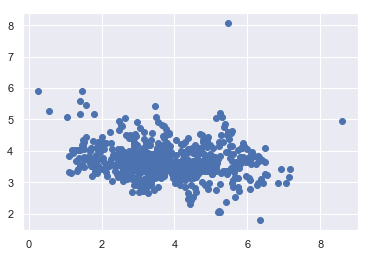

In [55]:
plt.scatter(DFa.iloc[:,-1],y_cv)

# Testing New Data

In [157]:
from sklearn import linear_model
LinReg=linear_model.LinearRegression()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(a.iloc[:,:-1],a.iloc[:,-1], test_size=0.5, random_state=42)

In [166]:
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

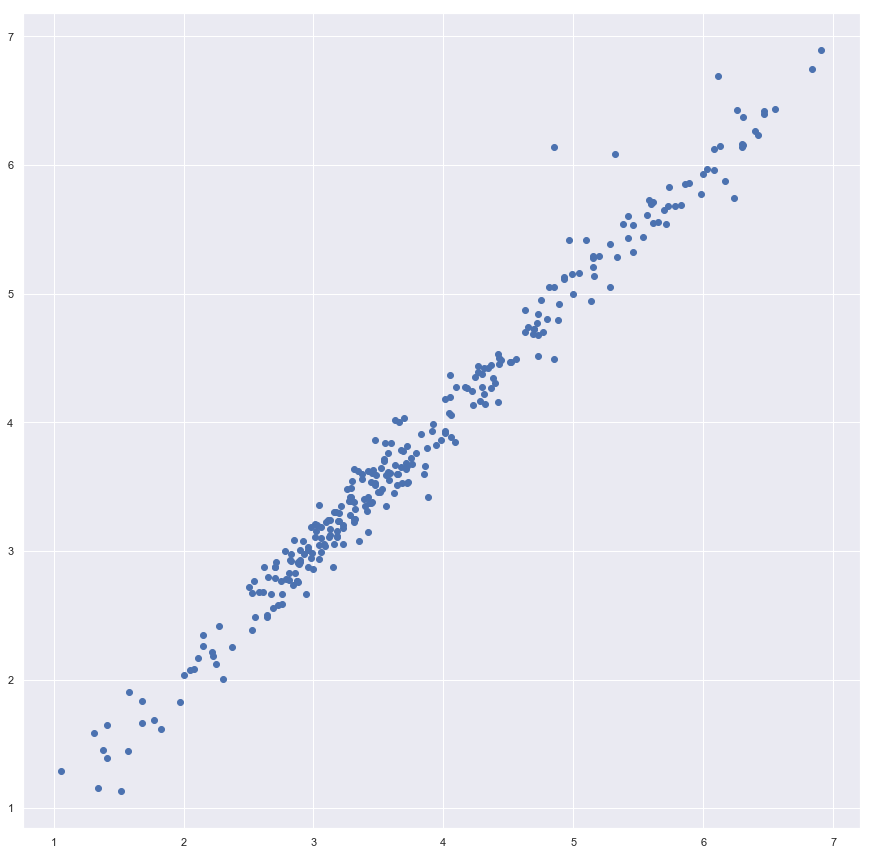

In [167]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,LinReg.predict(X_test))

In [158]:
y_cv=cross_val_predict(LinReg,a.iloc[:,:-1],a.iloc[:,-1],cv=10)

In [ ]:
a=pd.read_csv('C:/Users/Utsav Dutta/Desktop/ITC/test2.csv',skiprows=[0,1,2])

TEST1=pd.DataFrame([list(a['Absorbance'][0:201])],columns=DF.columns[0:201])
TEST1['target']=0

pls=PLSRegression(n_components=14)
pls.fit(snv(msc(deriv(DFa,1))).iloc[:,:-1],DFa['target'])
pls.predict(snv(msc(deriv(TEST1,1))).iloc[:,:-1]).ravel()[0].round(2)

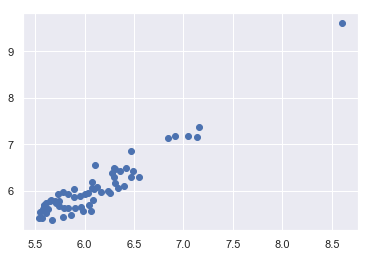

In [22]:
plt.scatter(Y_test,pls.predict(X_test))